# This notebook is to explore the dataset and test the effect of inbalanced data on RF, DT and LR to pick the best performing model.


In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#read in the dataset
credit_card_df= pd.read_csv('creditcard.csv')
credit_card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
from sklearn.preprocessing import StandardScaler

#Split the dataset into input and target features
X= credit_card_df.drop(columns=['Class'])
y= credit_card_df['Class']

#make an instance of standard scaler
scaler= StandardScaler()

#fit the scaler on the features and transform them
X_standardized= scaler.fit_transform(X)

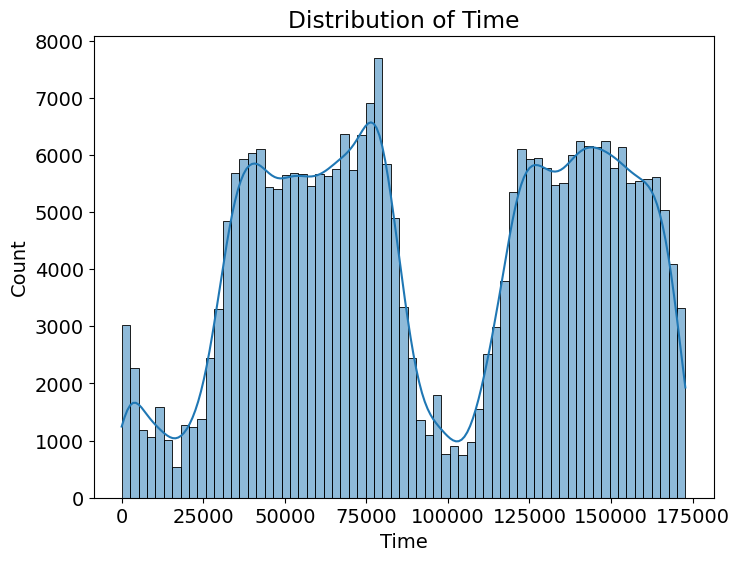

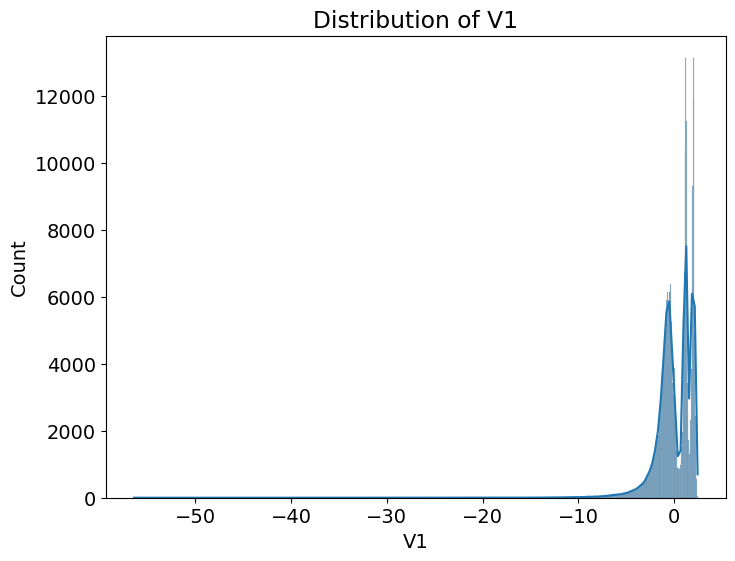

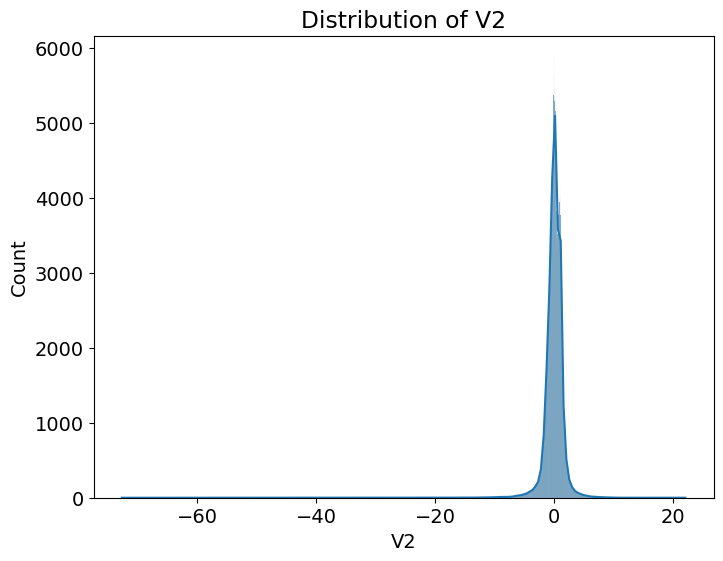

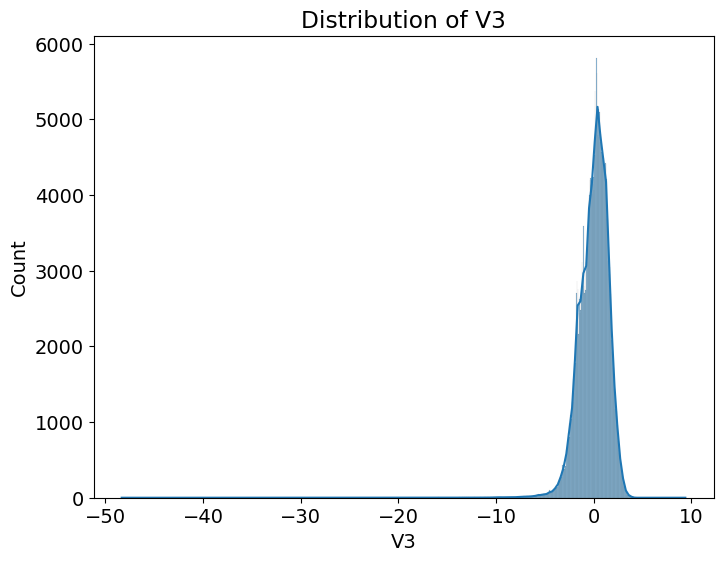

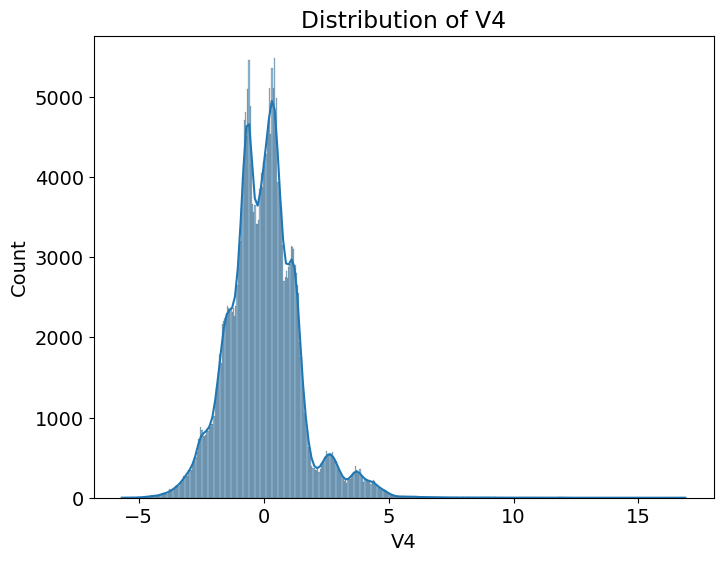

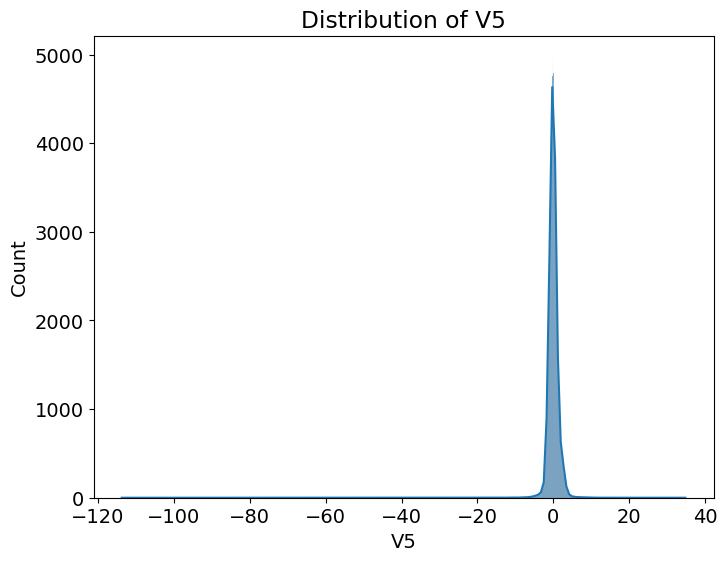

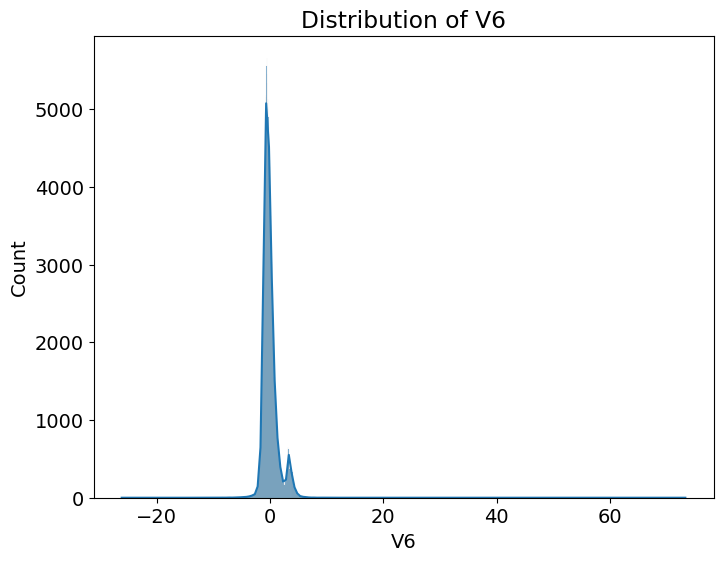

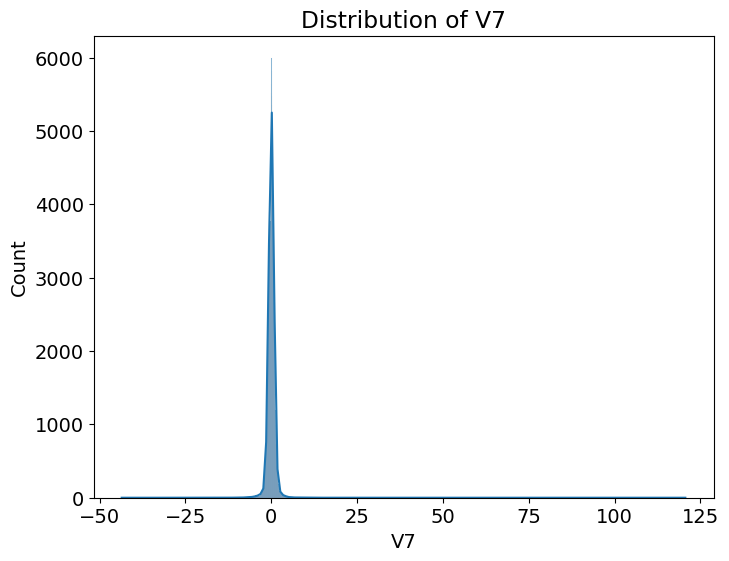

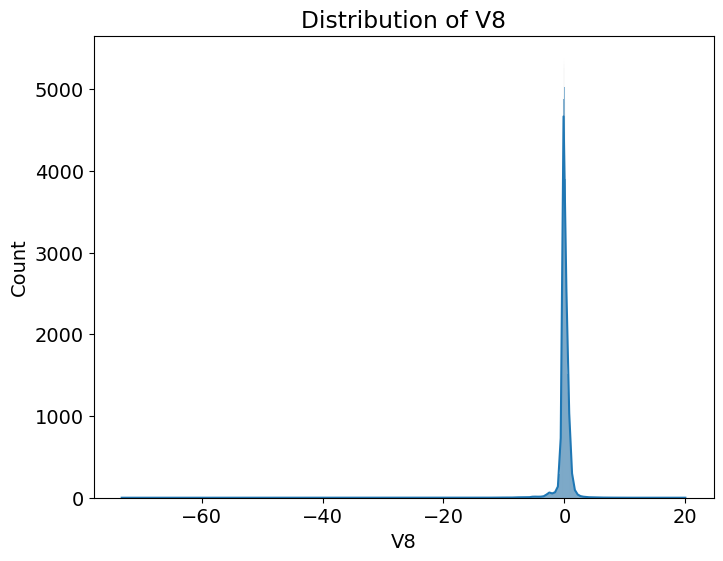

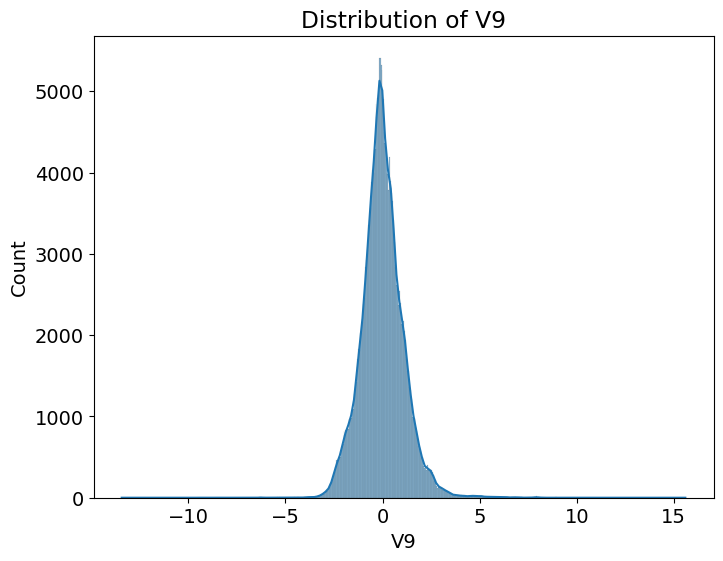

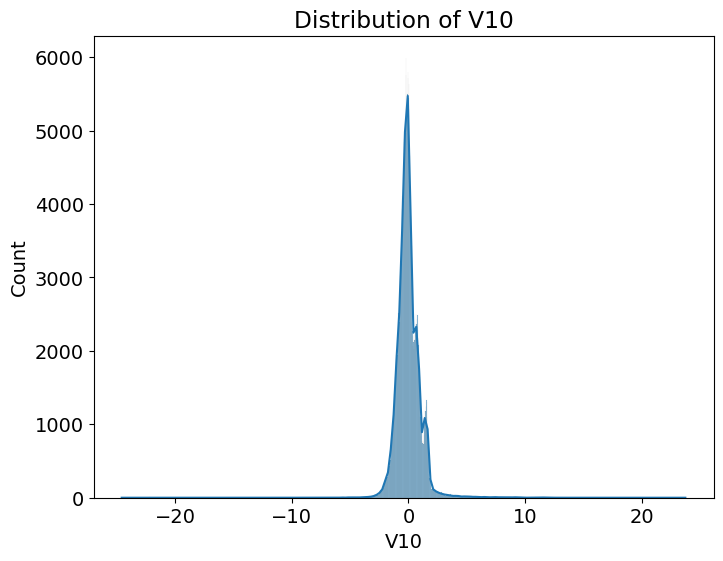

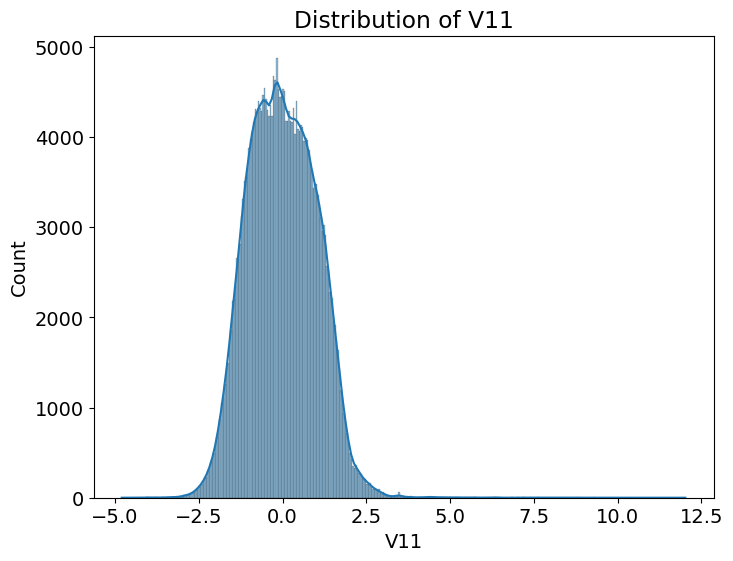

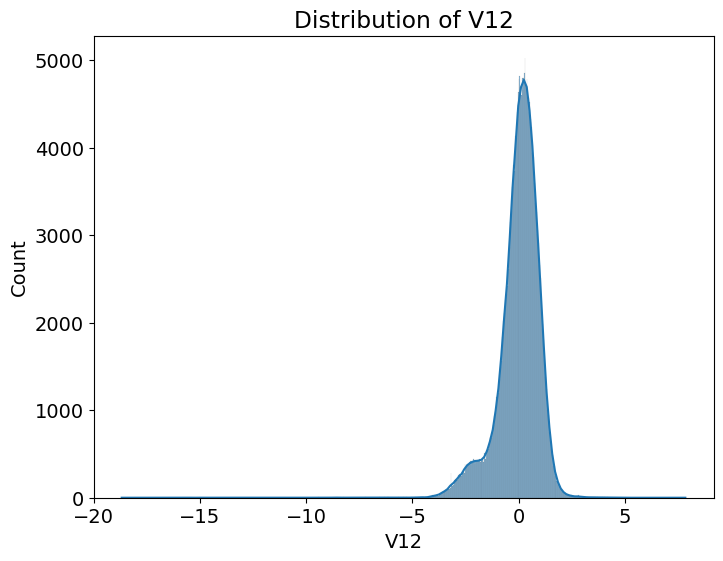

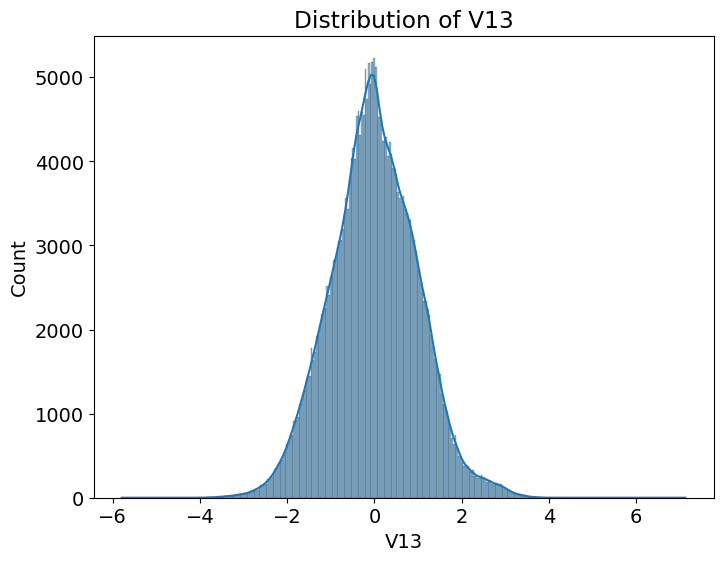

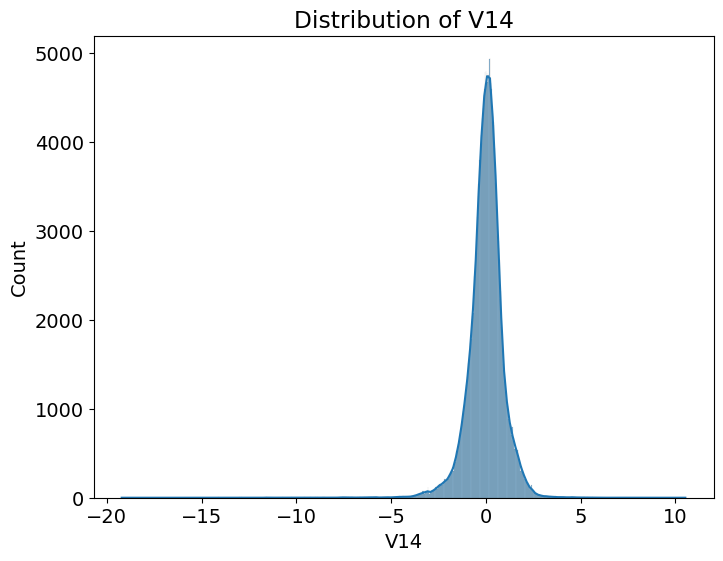

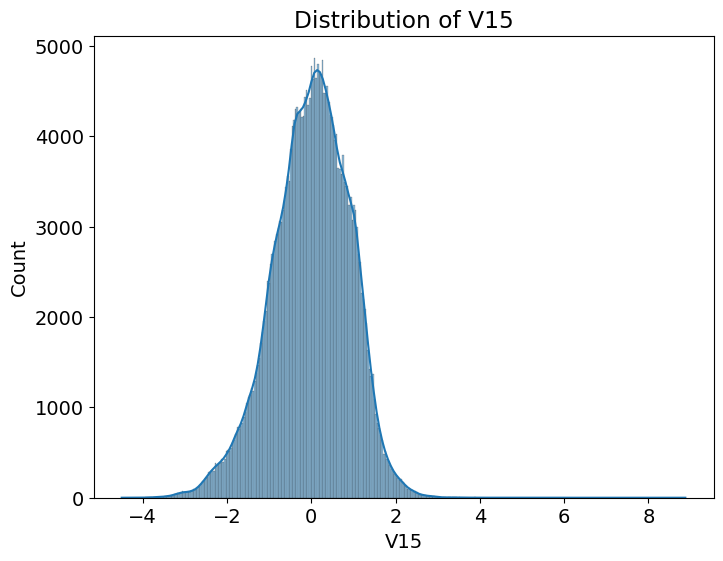

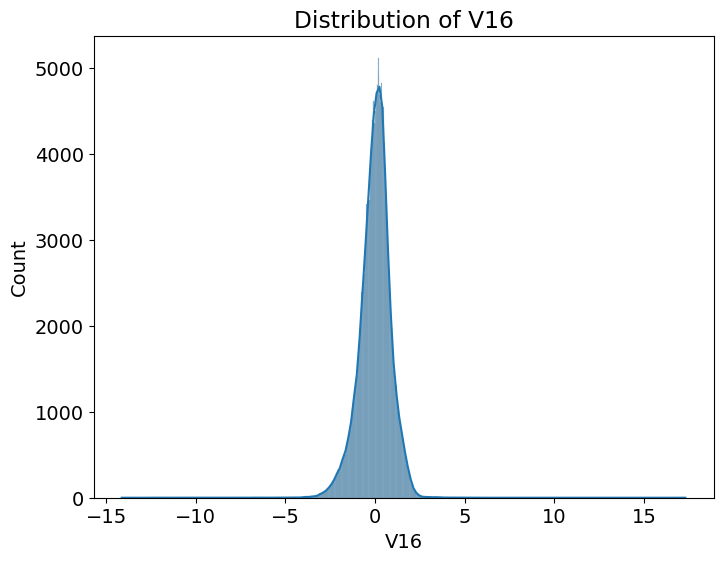

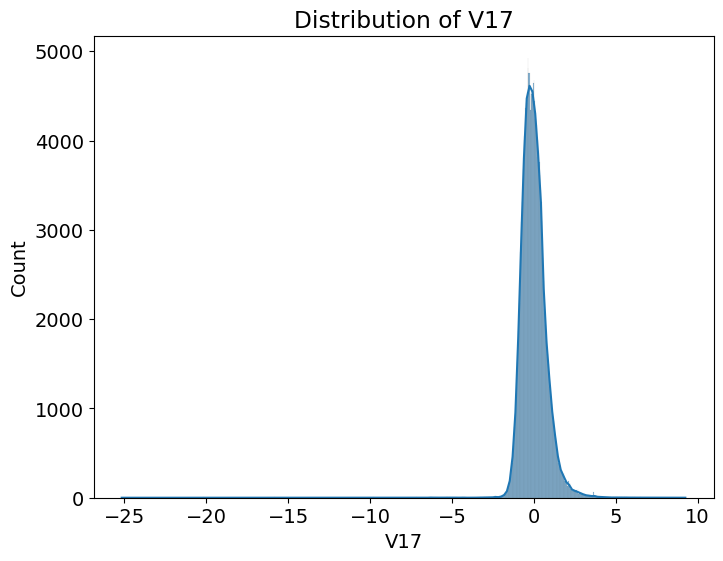

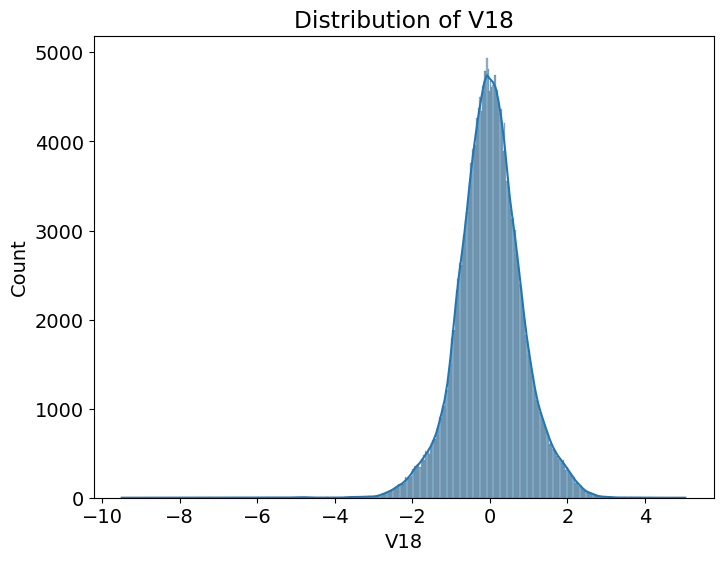

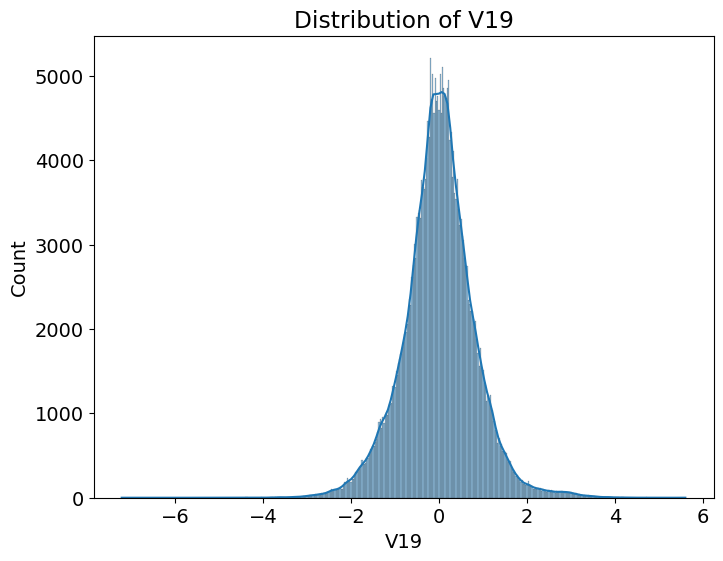

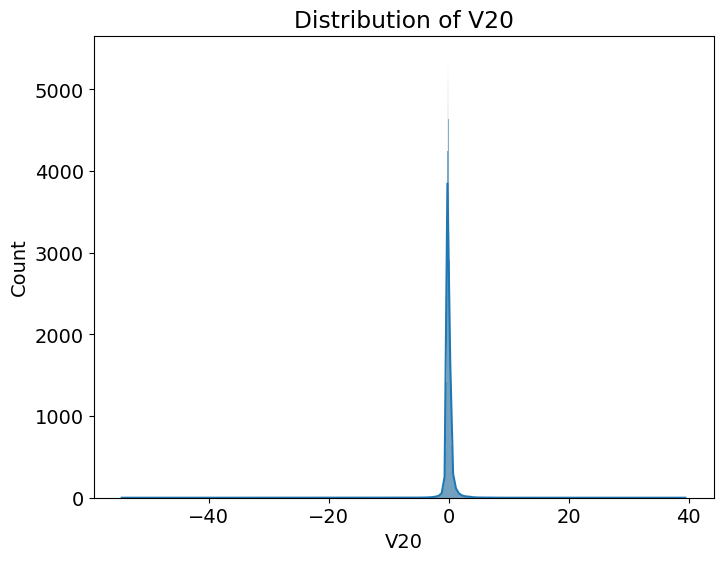

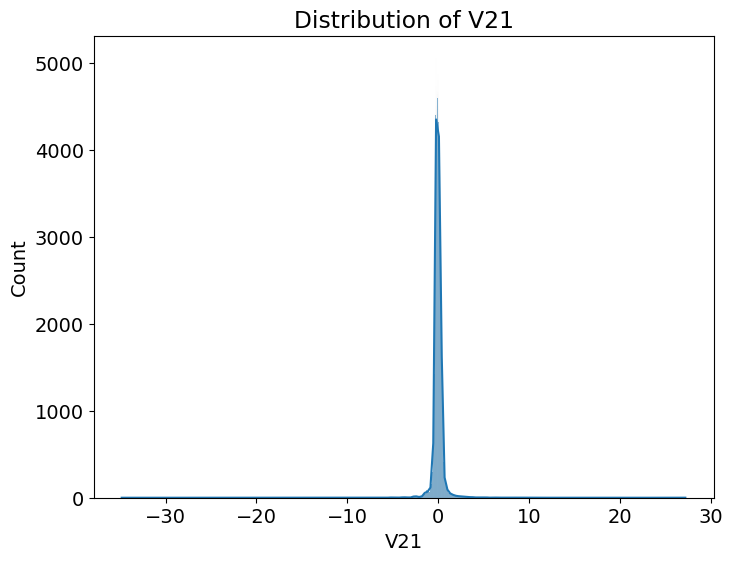

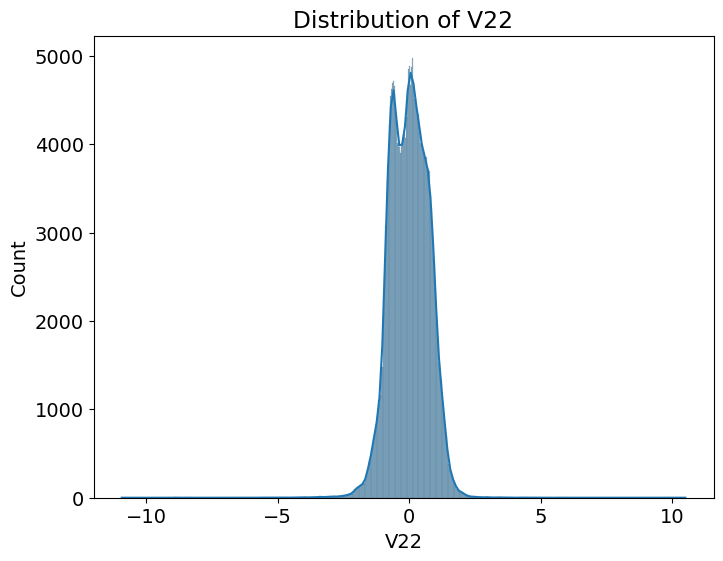

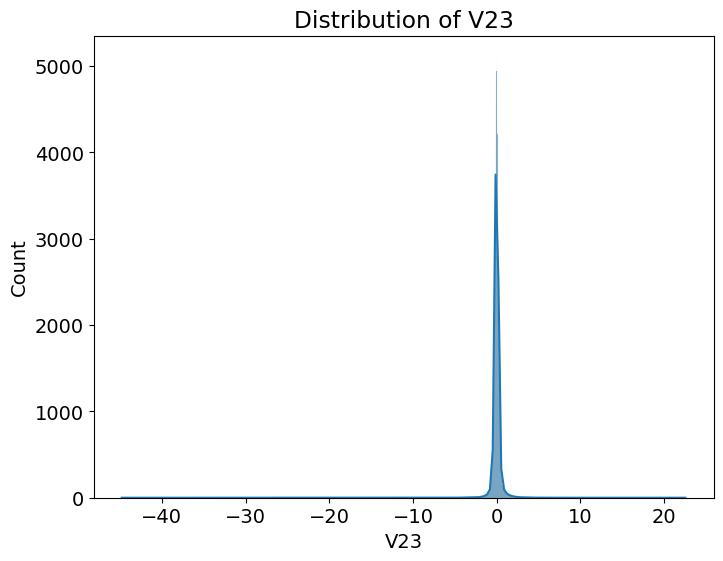

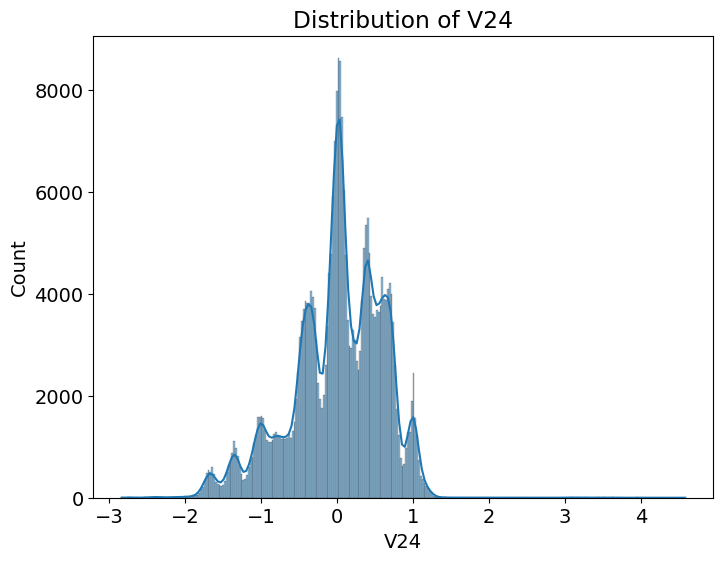

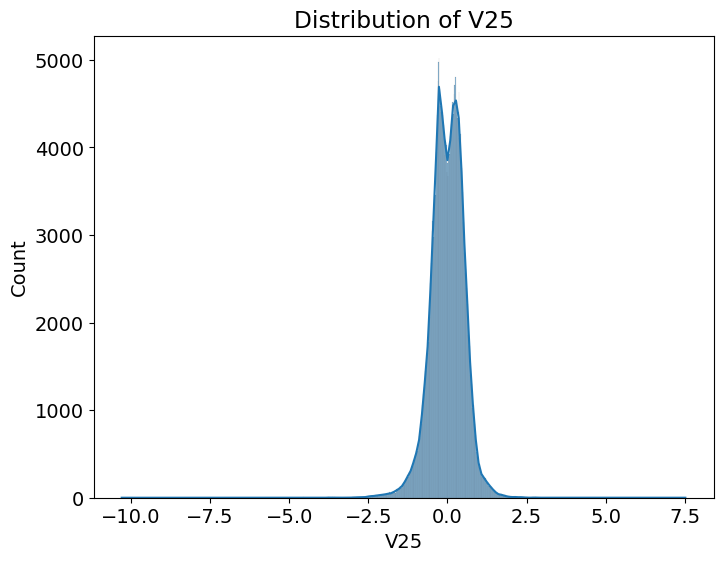

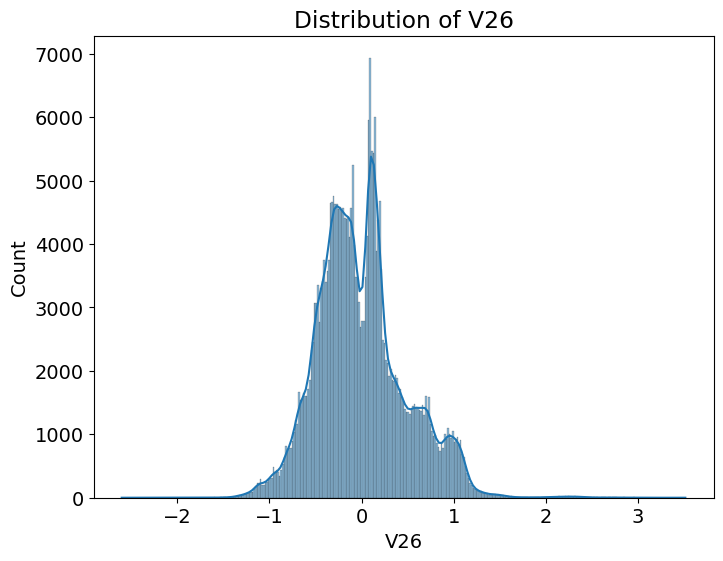

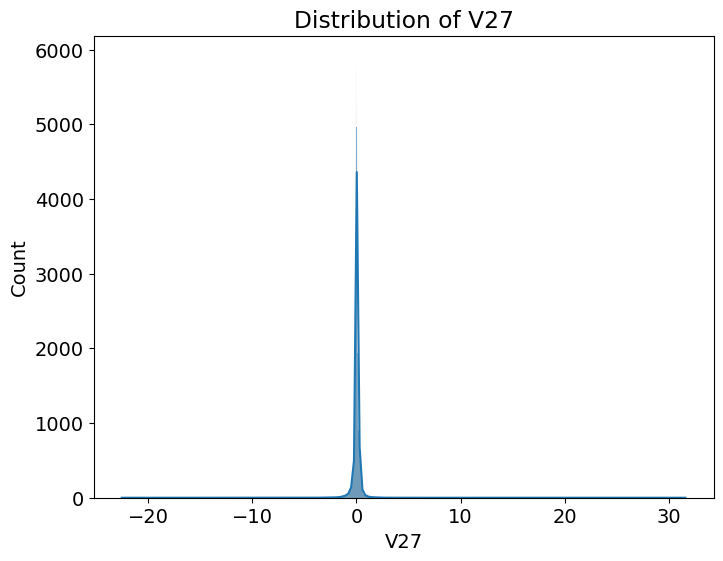

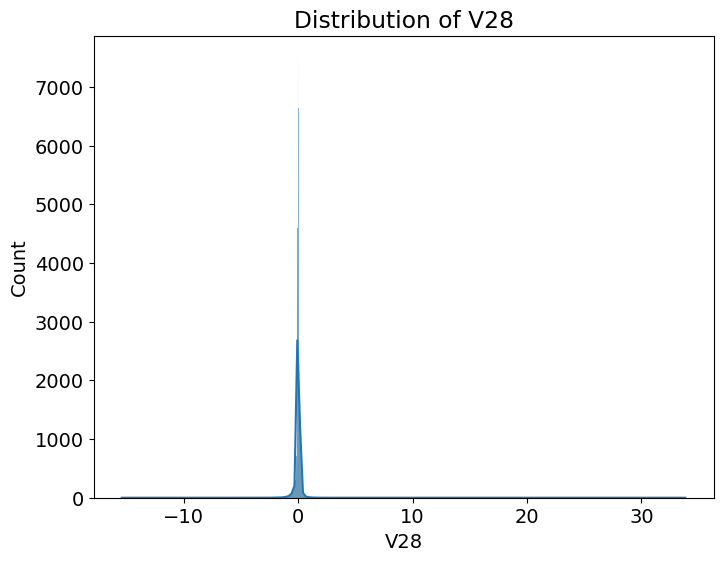

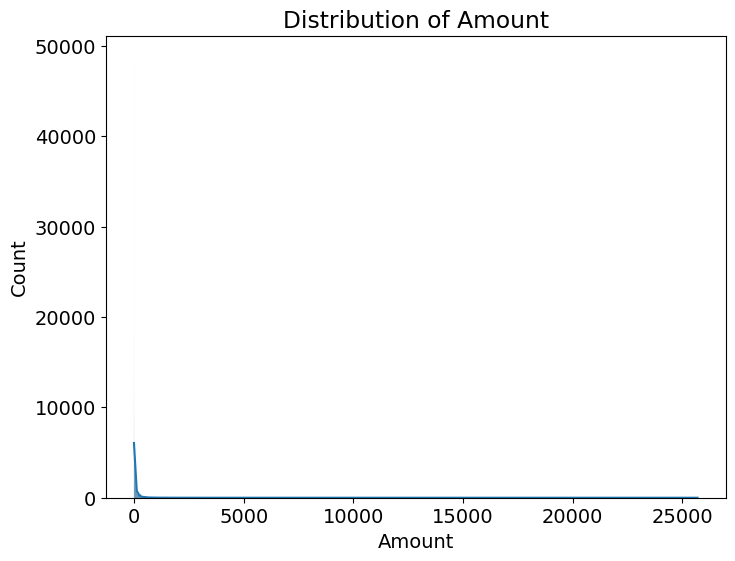

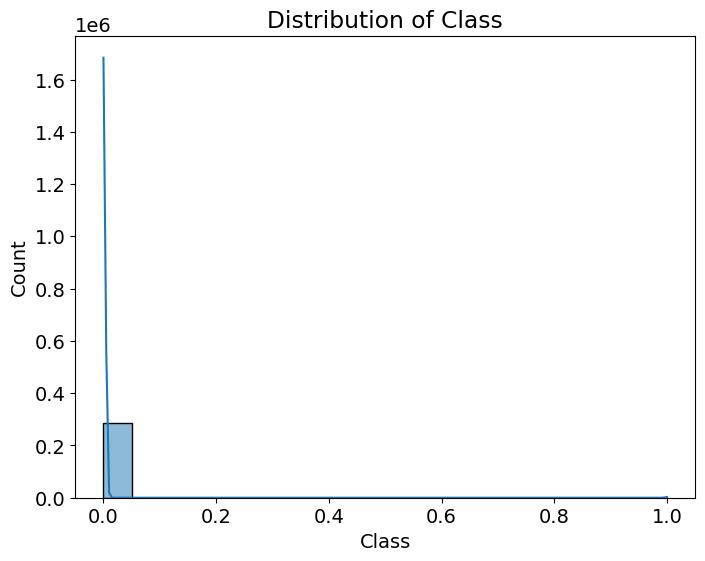

In [34]:

# Plot histograms for all features
for feature in credit_card_df.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=credit_card_df, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


## Random Forest

In [6]:
#train a RF model on the dataset
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

#split the data into train and test splits
X_train, X_test, y_train, y_test= train_test_split(X_standardized, y, test_size= 0.2, random_state=42)



Accuracy:  0.9995611109160493

 Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Precision:  0.974025974025974
Recall:  0.7653061224489796
ROC-AUC: 0.957394047236227


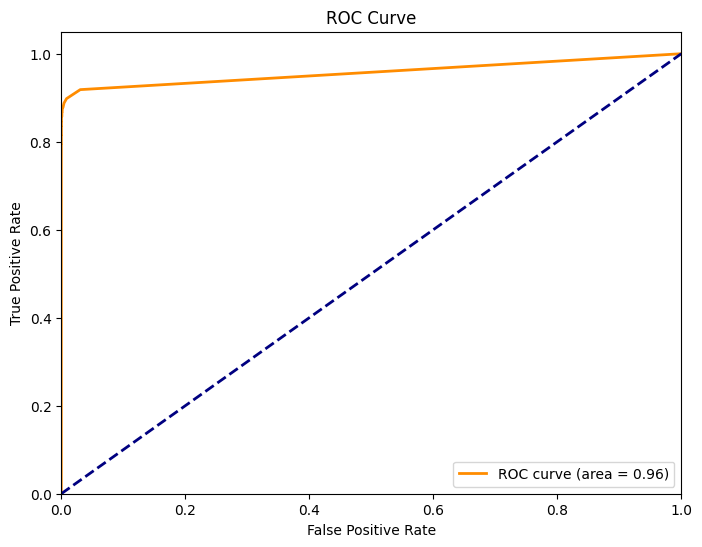

In [13]:
#make an instance of the RF classifier
rf_classifier= RandomForestClassifier(n_estimators=150, random_state=42)

#train the rf classifier on the training data
rf_classifier.fit(X_train, y_train)

#predict on the test data
y_pred= rf_classifier.predict(X_test)

#evalute the model's performance
accuracy= accuracy_score(y_test, y_pred)
classification= classification_report(y_test, y_pred)

#print out the accuracy and classification report
print('Accuracy: ', accuracy)
print('\n Classification report:\n', classification)
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve, auc

#calculate precision and recall score
precision= precision_score(y_test, y_pred)
recall= recall_score(y_test, y_pred)

# Calculate ROC-AUC
y_prob = rf_classifier.predict_proba(X_test)[:, 1]  # Predict class probabilities for the positive class
roc_auc = roc_auc_score(y_test, y_prob)

print('Precision: ', precision)
print('Recall: ', recall)
print("ROC-AUC:", roc_auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [19]:
# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature names and their importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance (descending)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(importance_df)

   Feature  Importance
17     V17    0.157490
12     V12    0.134838
14     V14    0.124639
10     V10    0.081065
16     V16    0.074831
11     V11    0.057885
9       V9    0.034005
7       V7    0.029710
18     V18    0.028332
4       V4    0.026837
21     V21    0.018506
3       V3    0.017321
26     V26    0.017041
20     V20    0.014059
2       V2    0.014042
1       V1    0.013806
19     V19    0.013519
6       V6    0.012777
29  Amount    0.012669
8       V8    0.012464
15     V15    0.012362
0     Time    0.011416
22     V22    0.010975
5       V5    0.010946
27     V27    0.010839
24     V24    0.010780
28     V28    0.010314
13     V13    0.009899
25     V25    0.008378
23     V23    0.008256


## Decision Tree

Accuracy:  0.9995084442259752
Precision:  0.9069767441860465
Recall:  0.7959183673469388

 Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.80      0.85        98

    accuracy                           1.00     56962
   macro avg       0.95      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.9383782142570026


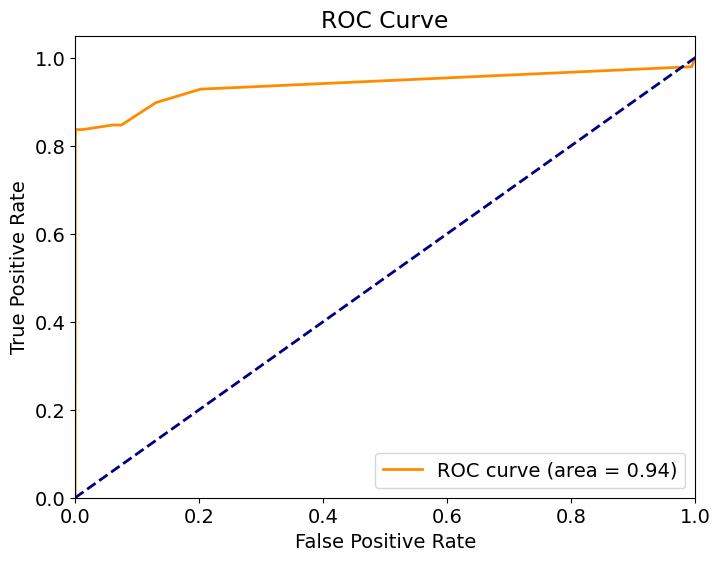

In [27]:
from sklearn.tree import DecisionTreeClassifier

#make an instance of the classifier class
dt_classifier= DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42)

#train the model with the training data
dt_classifier.fit(X_train, y_train)

#predict with the test data
dt_y_pred= dt_classifier.predict(X_test)

#evaluate the models performance
accuracy= accuracy_score(y_test, dt_y_pred)
precision=precision_score(y_test, dt_y_pred)
recall=recall_score(y_test, dt_y_pred)
classification=classification_report(y_test, dt_y_pred)

# Calculate ROC-AUC
y_prob = dt_classifier.predict_proba(X_test)[:, 1]  # Predict class probabilities for the positive class
roc_auc = roc_auc_score(y_test, y_prob)

print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('\n Classification report:\n', classification)
print("ROC-AUC:", roc_auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()




## Logistic Regression

Accuracy:  0.9991222218320986
Precision:  0.8636363636363636
Recall:  0.5816326530612245

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.9747377918528132


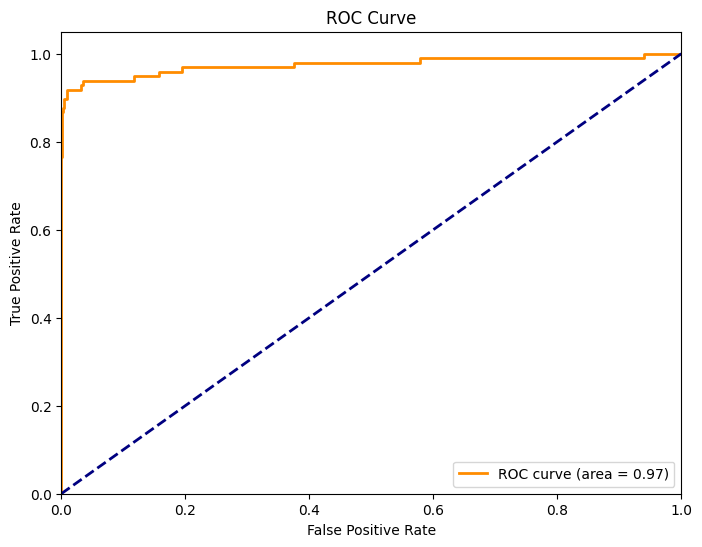

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_auc_score, roc_curve, auc

# Make an instance of the Logistic Regression class
lr_classifier = LogisticRegression(random_state=42)

# Train the model with the training data
lr_classifier.fit(X_train, y_train)

# Predict with the test data
lr_y_pred = lr_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, lr_y_pred)
precision = precision_score(y_test, lr_y_pred)
recall = recall_score(y_test, lr_y_pred)
classification = classification_report(y_test, lr_y_pred)

# Calculate ROC-AUC
y_prob = lr_classifier.predict_proba(X_test)[:, 1]  # Predict class probabilities for the positive class
roc_auc = roc_auc_score(y_test, y_prob)

print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('\nClassification report:\n', classification)
print("ROC-AUC:", roc_auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


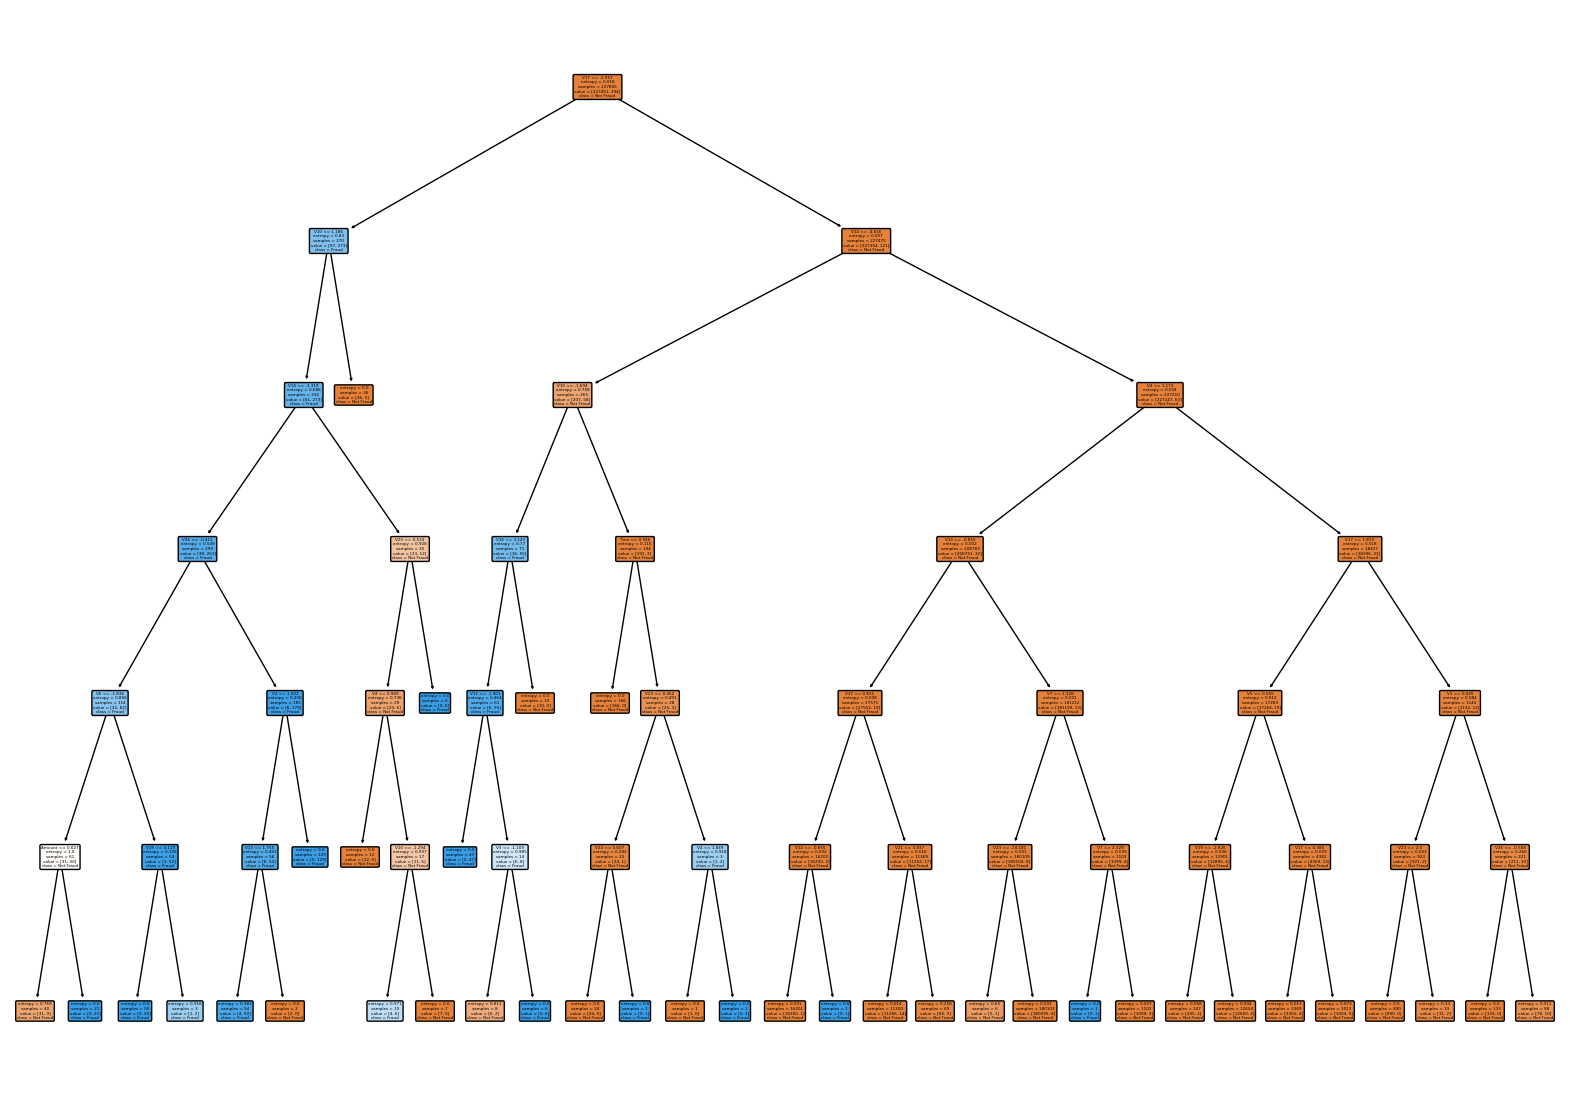

In [26]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Convert the Index object to a list of feature names
feature_names = credit_card_df.columns[:-1].tolist()

plt.figure(figsize=(20, 14))
plt.rcParams.update({'font.size': 14})
plot_tree(dt_classifier, feature_names=feature_names, class_names=["Not Fraud", "Fraud"], filled=True, rounded=True)
plt.show()